# Cancer Prediction using Logistic Regression

# Attribute Information:

## Input variables:

1) id, 2) radius_mean, 3) texture_mean, 4) perimeter_mean, 5) area_mean, 6) smoothness_mean, 7) compactness_mean,
8) concavity_mean, 9) concave points_mean, 10) symmetry_mean, 11) fractal_dimension_mean,
12) radius_se, 13) texture_se, 14) perimeter_se, 15) area_se, 16) smoothness_se,
17) compactness_se, 18) concavity_se, 19) concave points_se, 20) symmetry_se,
21) fractal_dimension_se, 22) radius_worst, 23) texture_worst,
24) perimeter_worst, 25) area_worst, 26)smoothness_worst,
27) compactness_worst, 28) concavity_worst, 29) concave points_worst,
30) symmetry_worst, 31) fractal_dimension_worst

## Output variable:

33) diagnosis [Malignant(M) and Benign(B)]

## Dataset Link --- https://www.kaggle.com/subratac2020/cancer-data-set

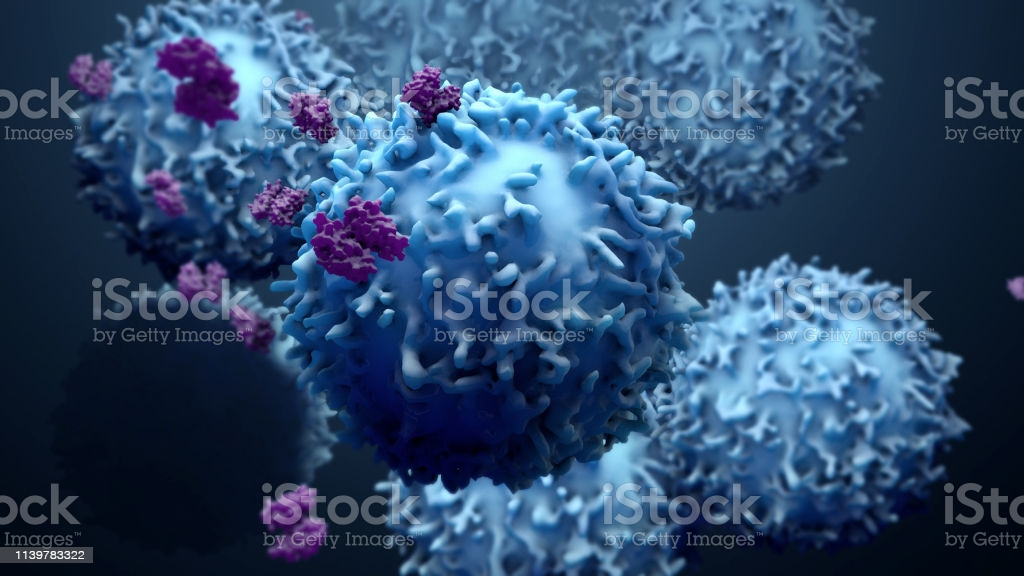

In [91]:
from IPython.display import Image
Image(filename='istockphoto-1139783322-1024x1024.jpg') 

# Importing all the necessary libraries

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



## Loading the Data 

In [23]:
df = pd.read_csv('CancerData.csv')

In [24]:
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,2,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,3,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [25]:
df.shape

(569, 32)

In [26]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [27]:
for i in df.columns:
    print(i)

id
diagnosis
radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
perimeter_se
area_se
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
radius_worst
texture_worst
perimeter_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave points_worst
symmetry_worst
fractal_dimension_worst


# Lets do some Analysis

In [28]:
df.isna().sum().any()# Data is clean

False

In [29]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [30]:
df.drop('id',axis=1,inplace=True)

In [69]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,...,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,0.246231,13.376209,18.505879,86.403266,570.547990,0.093271,0.086260,0.060442,0.035902,0.173639,...,15.087623,24.723015,98.640477,728.471608,0.128684,0.211521,0.213448,0.096333,0.279092,0.079529
std,0.431357,2.484104,3.911148,16.841597,222.883241,0.012066,0.034979,0.049068,0.025625,0.020819,...,3.232713,5.635779,22.129399,329.649485,0.020253,0.107702,0.147218,0.049968,0.043539,0.012479
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.062510,0.019380,0.000000,0.000000,0.116700,...,7.930000,12.020000,50.410000,185.200000,0.081250,0.034320,0.000000,0.000000,0.178300,0.055210
25%,0.000000,11.710000,15.702500,75.065000,420.350000,0.084520,0.059592,0.025627,0.018640,0.159000,...,13.015000,20.385000,83.922500,516.025000,0.113900,0.136100,0.104825,0.061493,0.247725,0.070195
50%,0.000000,12.995000,18.175000,84.065000,518.300000,0.092385,0.079455,0.045580,0.028295,0.172250,...,14.395000,24.585000,93.905000,632.500000,0.128900,0.188300,0.181100,0.084985,0.275750,0.078030
75%,0.000000,14.640000,20.755000,94.730000,664.200000,0.101750,0.108975,0.083573,0.049478,0.188500,...,16.457500,28.435000,109.775000,830.575000,0.141775,0.265575,0.304350,0.128700,0.307325,0.086570
max,1.000000,20.590000,29.810000,137.800000,1320.000000,0.125700,0.202200,0.254500,0.125900,0.245900,...,24.560000,40.540000,166.400000,1872.000000,0.187800,0.611000,0.772700,0.254300,0.412800,0.120500


### Data Visualization

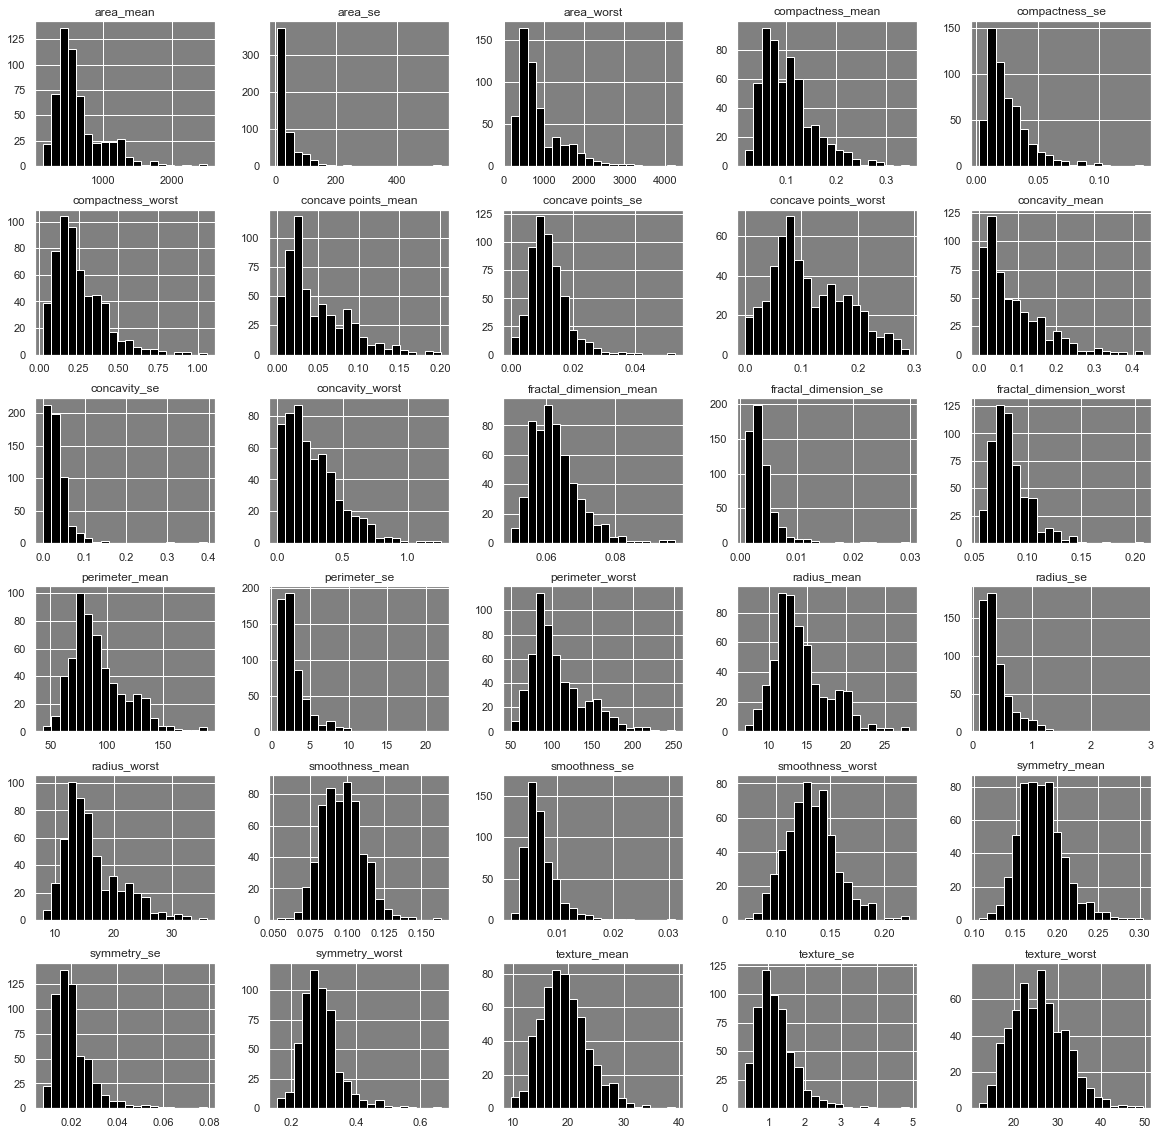

In [31]:
sns.set(rc={'axes.facecolor':'grey'})
df.hist(bins=20,figsize=(20,20),color='black')
plt.show()

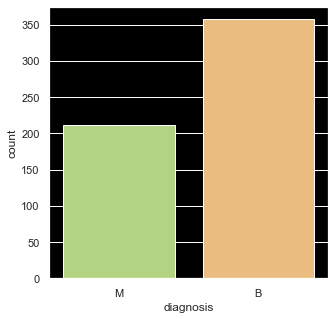

In [32]:
sns.set(rc={'axes.facecolor':'black'})
plt.figure(figsize=(5,5))
sns.countplot(x='diagnosis',data=df,palette='RdYlGn_r')
plt.show()

## Encoding the dependent variable

In [33]:
df["diagnosis"] = df["diagnosis"].replace({'M':1,'B':0})

## Checking for outliers

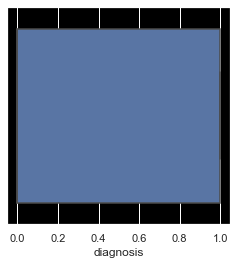

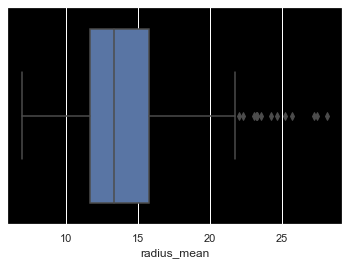

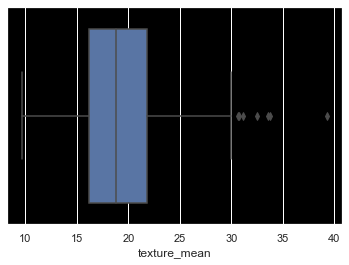

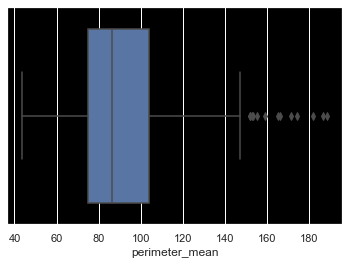

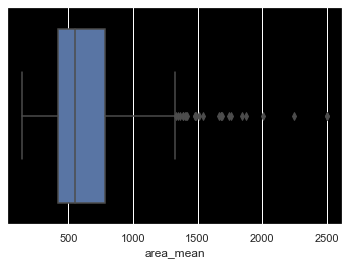

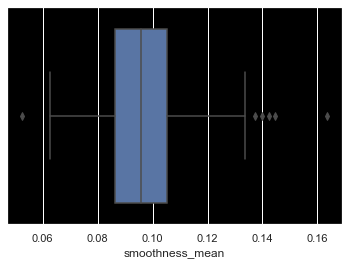

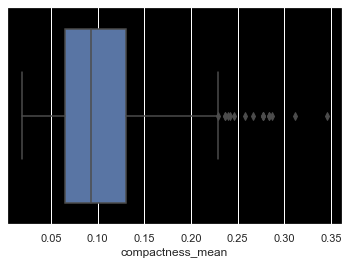

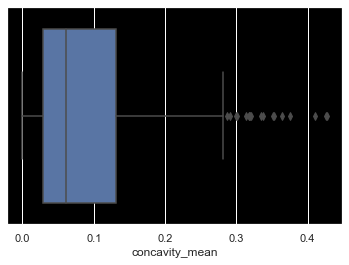

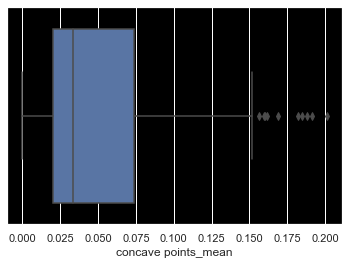

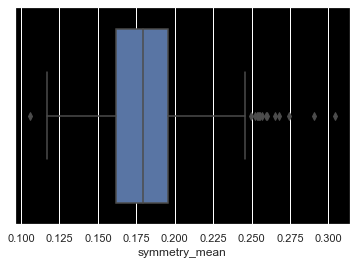

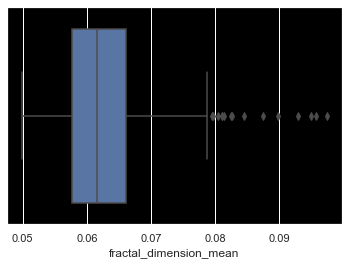

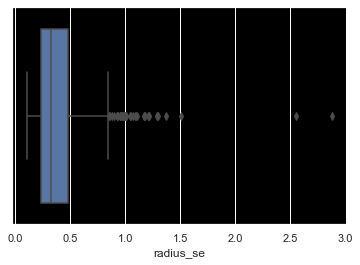

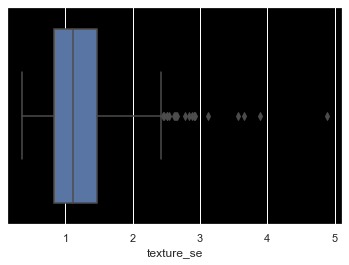

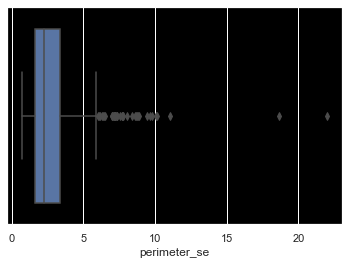

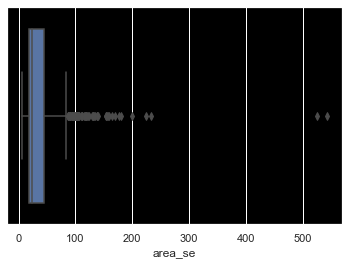

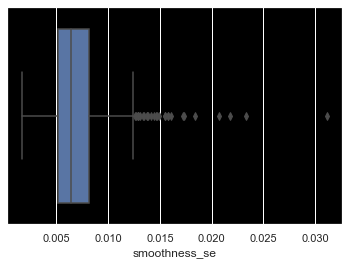

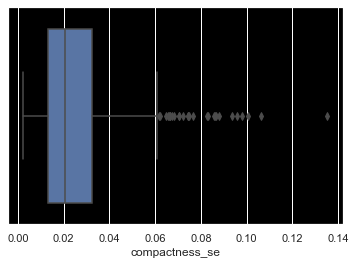

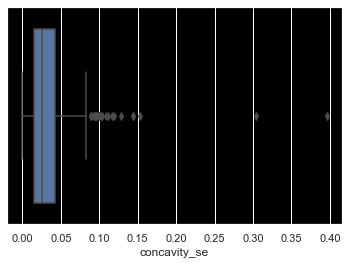

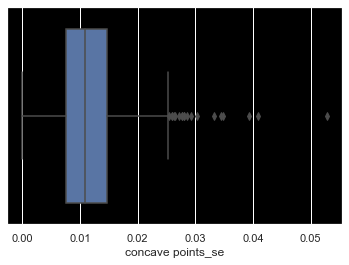

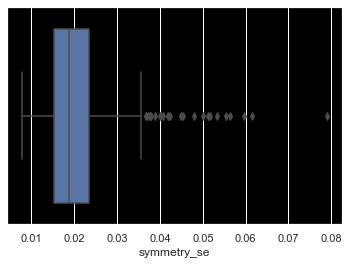

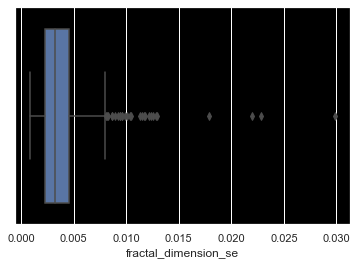

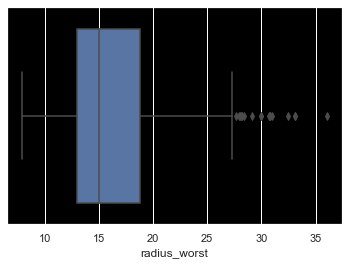

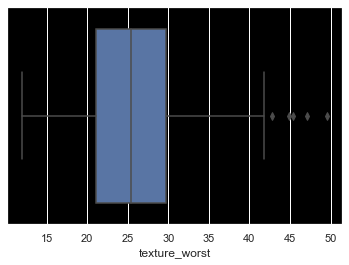

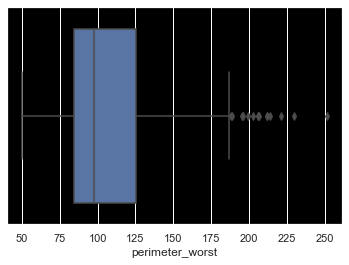

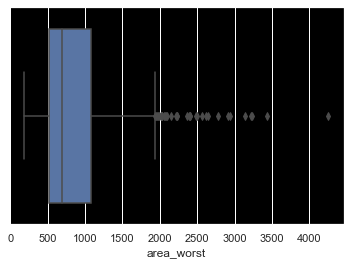

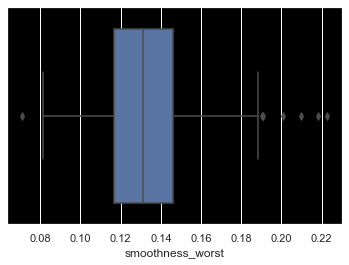

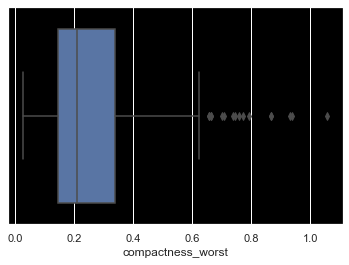

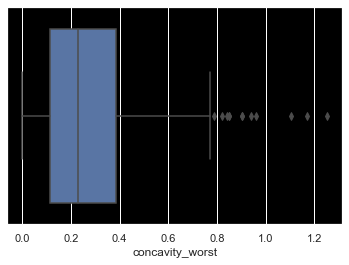

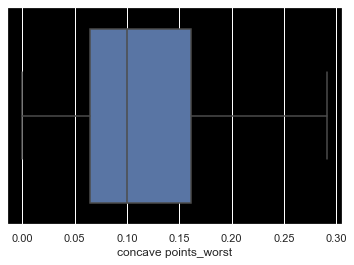

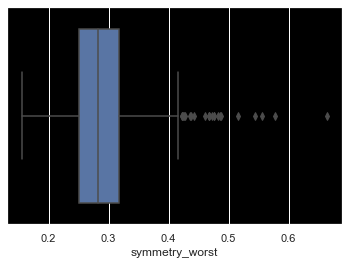

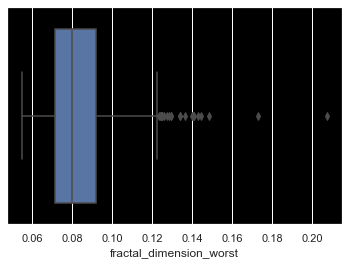

In [34]:
sns.set(rc={'axes.facecolor':'black'})
plt.figure(figsize = (4,4))
for i in df.columns:
    sns.boxplot(x=df[i])
    plt.xlabel(i)
    plt.show()


In [35]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

diagnosis                    1.000000
radius_mean                  4.080000
texture_mean                 5.630000
perimeter_mean              28.930000
area_mean                  362.400000
smoothness_mean              0.018930
compactness_mean             0.065480
concavity_mean               0.101140
concave points_mean          0.053690
symmetry_mean                0.033800
fractal_dimension_mean       0.008420
radius_se                    0.246500
texture_se                   0.640100
perimeter_se                 1.751000
area_se                     27.340000
smoothness_se                0.002977
compactness_se               0.019370
concavity_se                 0.026960
concave points_se            0.007072
symmetry_se                  0.008320
fractal_dimension_se         0.002310
radius_worst                 5.780000
texture_worst                8.640000
perimeter_worst             41.290000
area_worst                 568.700000
smoothness_worst             0.029400
compactness_

## Removing Outliers

In [36]:
df= df[~((df< (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]

In [37]:
df.shape

(398, 31)

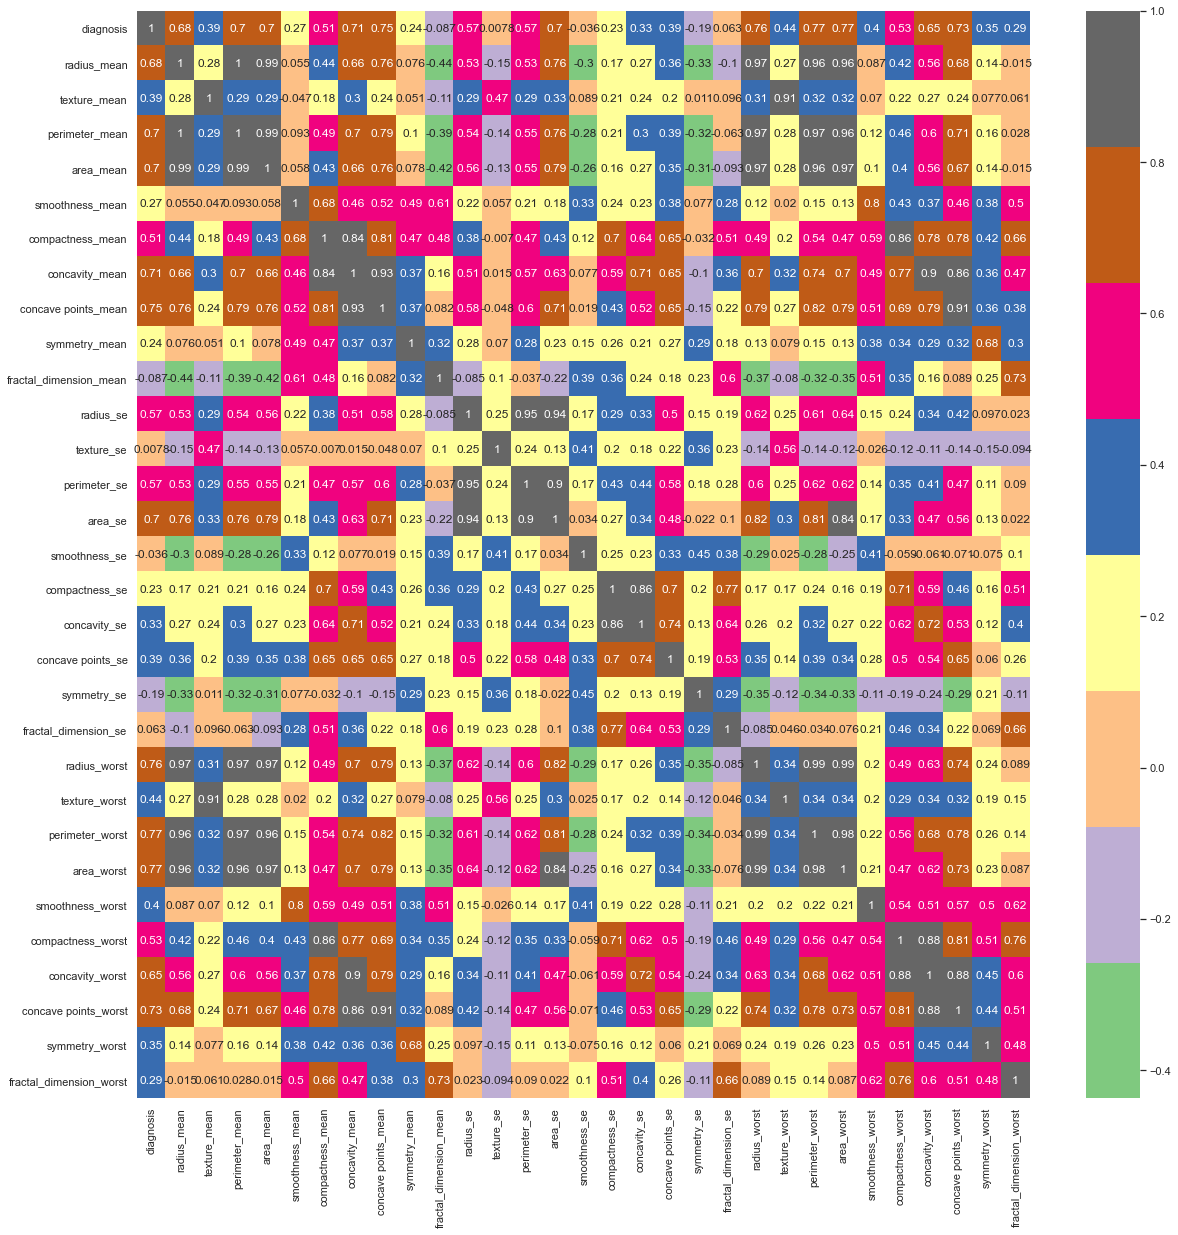

In [38]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cbar=True,cmap='Accent')
plt.show()

# Feature Selection


# SelectKBest -
### The SelectKBest method selects the features according to the k highest score. By changing the 'score_func' parameter we can apply the method for both classification and regression data. Selecting best features is important process when we prepare a large dataset for training.

In [39]:
x=df.drop('diagnosis',axis=1)
y=df.diagnosis

In [47]:
kbest=SelectKBest(score_func=chi2,k=30)
feature=kbest.fit(x,y)

In [48]:
feature.scores_

array([8.48622477e+01, 4.95549433e+01, 6.31015012e+02, 1.68411053e+04,
       4.57030260e-02, 1.48974817e+00, 7.98456376e+00, 4.10806934e+00,
       5.88012299e-02, 1.22425803e-03, 6.92600549e+00, 3.78581637e-03,
       4.70756847e+01, 1.79383153e+03, 3.21168198e-04, 1.19496363e-01,
       4.00983301e-01, 9.82838445e-02, 2.24805186e-02, 8.91321812e-04,
       1.59281645e+02, 9.78057182e+01, 1.16309897e+03, 3.54441720e+04,
       1.99295067e-01, 6.20811871e+00, 1.72047225e+01, 5.43297739e+00,
       3.25437210e-01, 6.57483624e-02])

In [49]:
score=pd.DataFrame(feature.scores_,columns=['Score'])
col=pd.DataFrame(x.columns,columns=['Feature'])

In [50]:
feature_rank=pd.concat([col,score],axis=1)

In [51]:
feature_rank

,Feature,Score
0,radius_mean,84.862248
1,texture_mean,49.554943
2,perimeter_mean,631.015012
3,area_mean,16841.105293
4,smoothness_mean,0.045703
5,compactness_mean,1.489748
6,concavity_mean,7.984564
7,concave points_mean,4.108069
8,symmetry_mean,0.058801
9,fractal_dimension_mean,0.001224


In [55]:
best_feature=feature_rank.nlargest(12,'Score')

In [64]:
best_feature

,Feature,Score
23,area_worst,35444.172010
3,area_mean,16841.105293
13,area_se,1793.831526
22,perimeter_worst,1163.098967
2,perimeter_mean,631.015012
20,radius_worst,159.281645
21,texture_worst,97.805718
0,radius_mean,84.862248
1,texture_mean,49.554943
12,perimeter_se,47.075685


### Important features are--
###  (['area_worst','area_mean','area_se','perimeter_worst','perimeter_mean','radius_worst','texture_worst','radius_mean','texture_mean','perimeter_se','concavity_worst','concavity_mean'])
 
 
 
 
 
 
 

 
 
 
 

In [65]:
df2=[]
for col in best_feature.Feature:
    df2.append(col)

In [66]:
df2

['area_worst',
 'area_mean',
 'area_se',
 'perimeter_worst',
 'perimeter_mean',
 'radius_worst',
 'texture_worst',
 'radius_mean',
 'texture_mean',
 'perimeter_se',
 'concavity_worst',
 'concavity_mean']

In [67]:
df2=df[df2]

In [68]:
df2.shape

(398, 12)

In [70]:
y.value_counts()

0    300
1     98
Name: diagnosis, dtype: int64

## Splitting the Data 

In [97]:
x_train,x_test,y_train,y_test=train_test_split(df2,y,test_size=0.15,random_state=0,stratify=y)

## Feature Scaling(Using StandardScaler)

In [98]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# Model Building (Logistic Regression)

In [99]:
classifier = LogisticRegression(max_iter=500)
classifier.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [103]:
print('Accuracy with LogisticRegression(train) : ' + str(round(accuracy_score(y_train, classifier.predict(x_train)),2)*100)+'%')# training data accuracy
print('Accuracy with LogisticRegression(test) : ' + str(round(accuracy_score(y_test, classifier.predict(x_test)),2)*100) +'%')# test data accuracy

Accuracy with LogisticRegression(train) : 97.0%
Accuracy with LogisticRegression(test) : 97.0%


In [101]:
print(confusion_matrix(y_test, classifier.predict(x_test)))

[[45  0]
 [ 2 13]]


In [102]:
print(classification_report(y_test, classifier.predict(x_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        45
           1       1.00      0.87      0.93        15

    accuracy                           0.97        60
   macro avg       0.98      0.93      0.95        60
weighted avg       0.97      0.97      0.97        60

